중간고사 과제 1
- 주어진 영상에 대하여 팽창, 침식, 열림, 닫기 연산을 위한 함수를 구현

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

주어진 영상을 읽고 가시화

In [ ]:
!wget https://www.shrednations.com/wp-content/uploads/corporate-espionage.jpg

--2021-10-25 14:01:42--  https://www.shrednations.com/wp-content/uploads/corporate-espionage.jpg
Resolving www.shrednations.com (www.shrednations.com)... 173.255.203.102
Connecting to www.shrednations.com (www.shrednations.com)|173.255.203.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 476829 (466K) [image/jpeg]
Saving to: ‘corporate-espionage.jpg’

corporate-espionage 100%[===================>] 465.65K  2.77MB/s    in 0.2s    

2021-10-25 14:01:42 (2.77 MB/s) - ‘corporate-espionage.jpg’ saved [476829/476829]



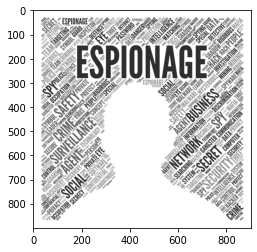

900 900


In [ ]:
img = cv2.imread('corporate-espionage.jpg', 0)
plt.imshow(img, 'gray')
plt.show()
height, width  = img.shape
print(width, height)

영상 이진화

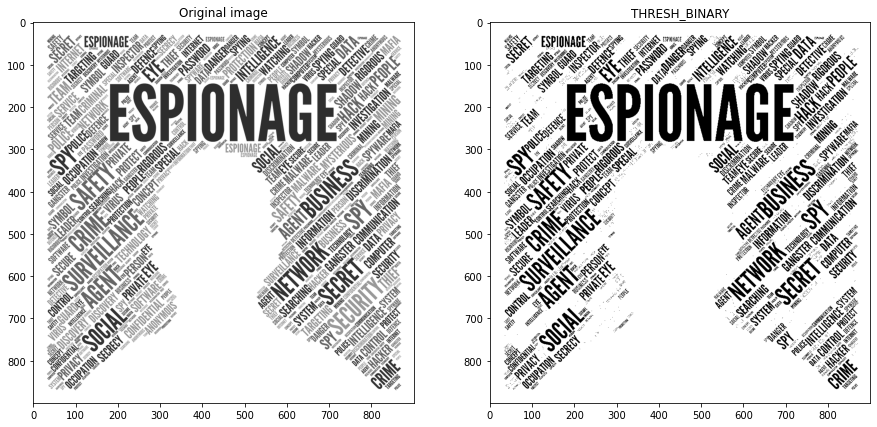

In [ ]:
ret, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Plot the images
images = [img, binary_img]
titles = ['Original image', 'THRESH_BINARY']
plot_img(images, titles)

문제 1: 4연결성 기준 3X3, 5X5 팽창, 침식, 열기, 닫기 함수를 구현하고 이에 대한 결과를 가시화하기
- 필터의 모양은 아래 그림을 참고하여사용할 것

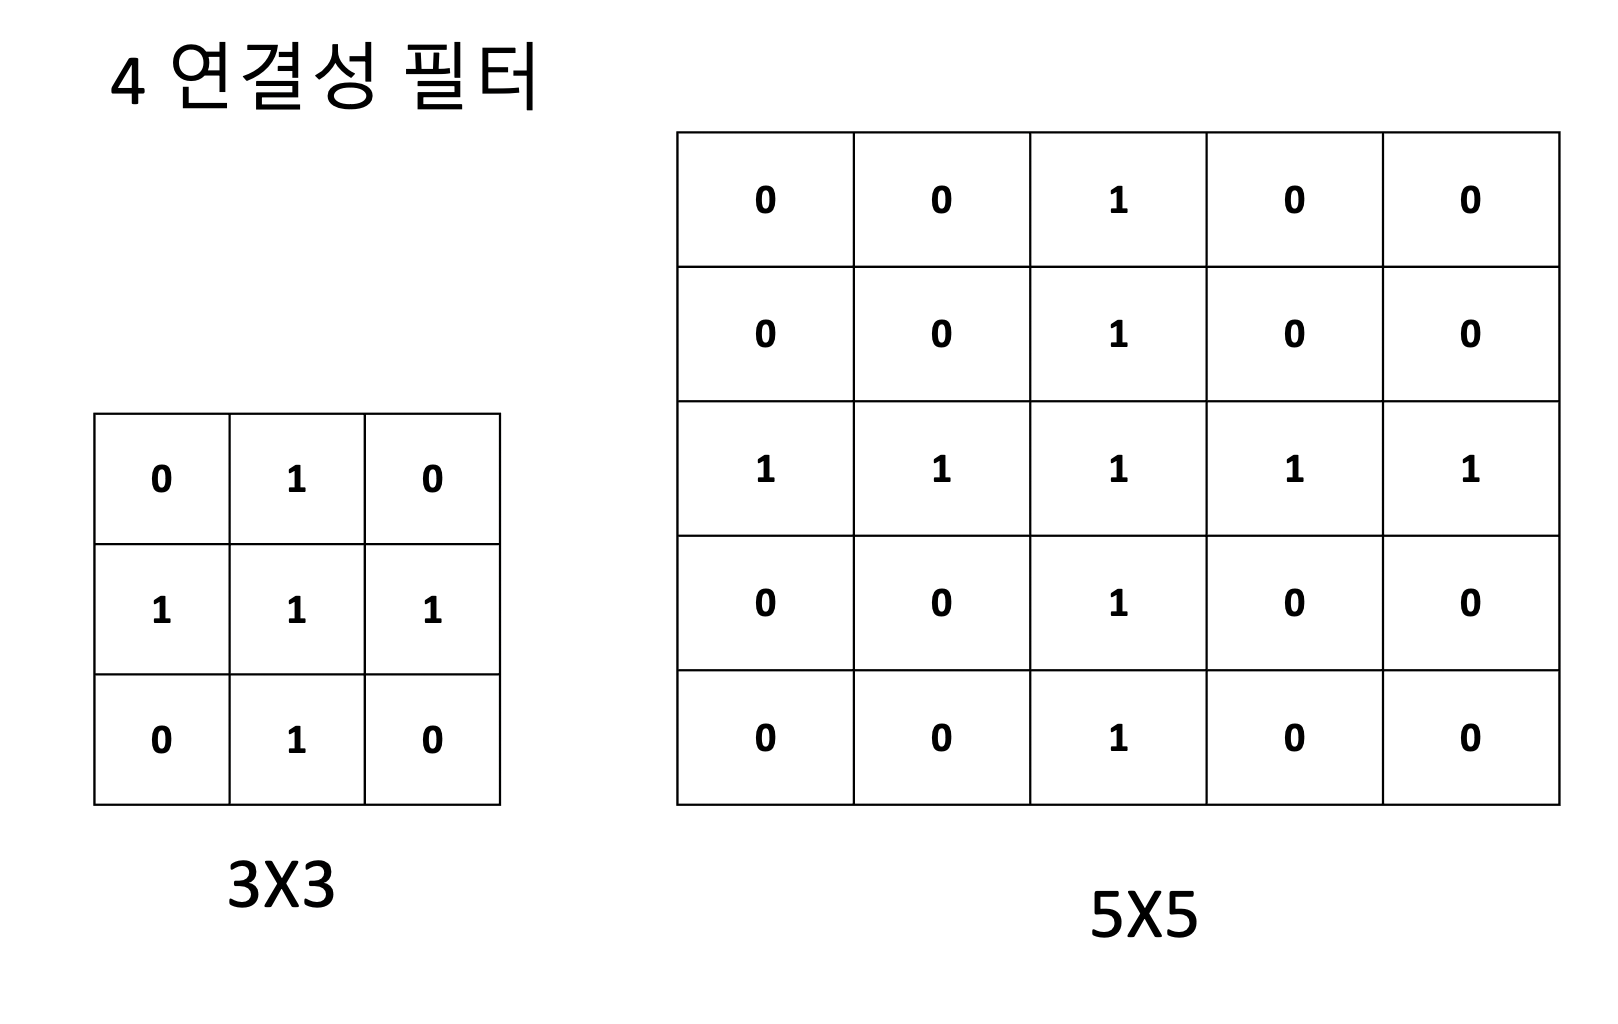

In [ ]:
#3x3 팽창(dilatioin) 함수 작성
def dilation_3x3(img):
    #함수 작성
    #2차원 배열 1줄 패딩
    img = np.pad(img, ((1,1),(1,1)), 'constant', constant_values=255)

    output_img = []
    for j in range(1, len(img) - 1):
      arr_width = []
      for i in range(1, len(img[j]) - 1):
        if (img[j+1][i] == 0 or img[j][i+1] == 0 or img[j-1][i] == 0 or 
            img[j][i-1] == 0 or img[j][i] == 0):
          arr_width.append(0)
        else:
          arr_width.append(255)
      output_img.append(arr_width)

    return output_img

#5x5 팽창(dilatioin) 함수 작성
def dilation_5x5(img):
    #함수 작성
    #2차원 배열 2줄 패딩
    img = np.pad(img, ((2,2),(2,2)), 'constant', constant_values=255)

    output_img = []
    for j in range(2, len(img) - 2):
      arr_width = []
      for i in range(2, len(img[j]) - 2):
        if (img[j+1][i] == 0 or img[j][i+1] == 0 or img[j-1][i] == 0 or 
            img[j][i-1] == 0 or img[j+2][i] == 0 or img[j][i+2] == 0 or 
            img[j-2][i] == 0 or img[j][i-2] == 0 or img[j][i] == 0):
          arr_width.append(0)
        else:
          arr_width.append(255)
      output_img.append(arr_width)

    return output_img


#3x3 침식(erosion) 함수 작성
def erosion_3x3(img):
    #함수 작성
    img = np.pad(img, ((1,1),(1,1)), 'constant', constant_values=0)

    output_img = []
    for j in range(1, len(img) - 1):
      arr_width = []
      for i in range(1, len(img[j]) - 1):
        if (img[j+1][i] != 0 or img[j][i+1] != 0 or img[j-1][i] != 0 or 
            img[j][i-1] != 0 or img[j][i] != 0):
          arr_width.append(255)
        else:
          arr_width.append(0)
      output_img.append(arr_width)

    return output_img

#5x5 침식(erosion) 함수 작성
def erosion_5x5(img):
    #함수 작성
    img = np.pad(img, ((2,2),(2,2)), 'constant', constant_values=0)

    output_img = []
    for j in range(2, len(img) - 2):
      arr_width = []
      for i in range(2, len(img[j]) - 2):
        if (img[j+1][i] != 0 or img[j][i+1] != 0 or img[j-1][i] != 0 or 
            img[j][i-1] != 0 or img[j+2][i] != 0 or img[j][i+2] != 0 or 
            img[j-2][i] != 0 or img[j][i-2] != 0 or img[j][i] != 0):
          arr_width.append(255)
        else:
          arr_width.append(0)
      output_img.append(arr_width)

    return output_img

#3x3 열기(open) 함수 작성
def open_3x3(img):
    #함수 작성
    erosion_img = erosion_3x3(img)
    output_img = dilation_3x3(erosion_img)

    return output_img

#5x5 열기(open) 함수 작성
def open_5x5(img):
    #함수 작성
    erosion_img = erosion_5x5(img)
    output_img = dilation_5x5(erosion_img)

    return output_img

#3x3 닫기(close) 함수 작성
def close_3x3(img):
    #함수 작성
    dilation_img = dilation_3x3(img)
    output_img = erosion_3x3(dilation_img)
    
    return output_img

#5x5 닫기(close) 함수 작성
def close_5x5(img):
    #함수 작성
    dilation_img = dilation_5x5(img)
    output_img = erosion_5x5(dilation_img)
    
    return output_img

# **중요: 주어진 이진화된 영상의 검은색 부분(픽셀 값이 0인 부분) 에대하여 팽창, 침식, 열기, 닫기 과정을 수행하시오**

함수를 이용하여 가시화

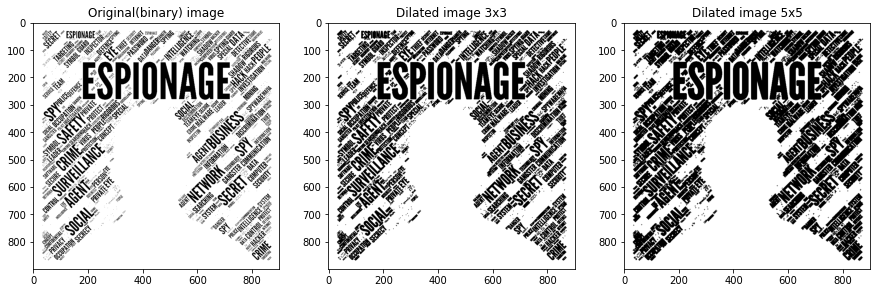

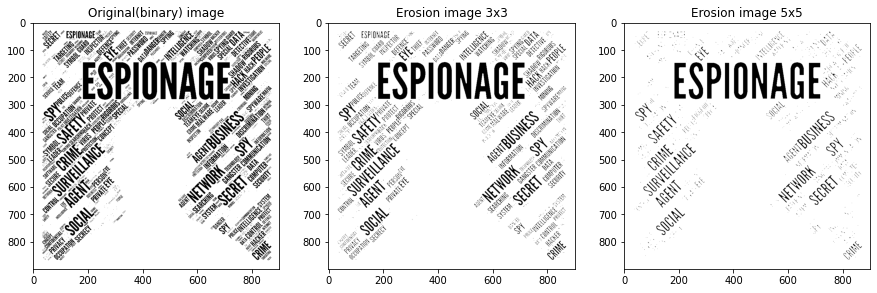

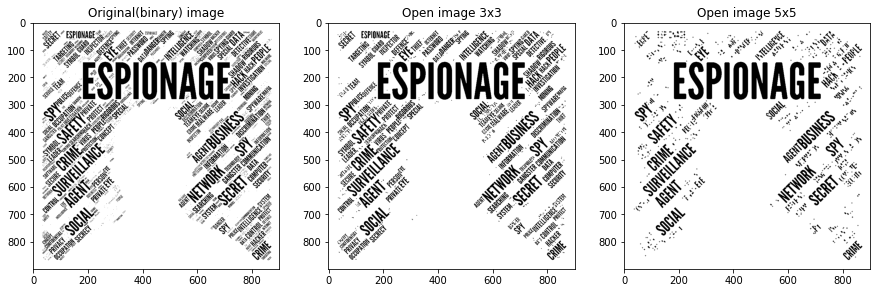

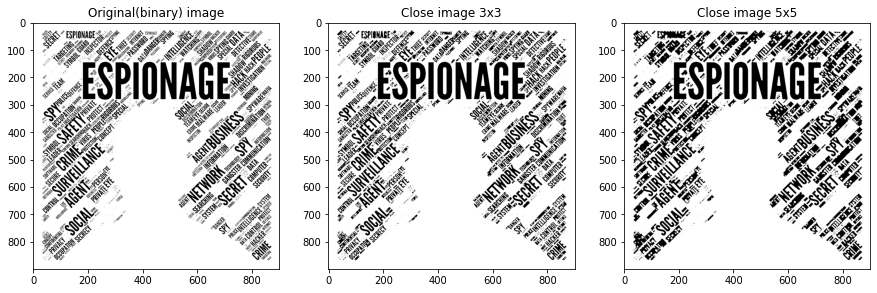

In [ ]:
# 팽창(dilation) 결과 출력
dilated_img = dilation_3x3(binary_img)
dilated_img5 = dilation_5x5(binary_img)
dilated_images = [binary_img, dilated_img, dilated_img5]
dilated_titles = ['Original(binary) image', 'Dilated image 3x3', 'Dilated image 5x5']
plot_img(dilated_images, dilated_titles)

# 침식(erosion) 결과 출력
erosion_img = erosion_3x3(binary_img)
erosion_img5 = erosion_5x5(binary_img)
erosion_images = [binary_img, erosion_img, erosion_img5]
erosion_titles = ['Original(binary) image', 'Erosion image 3x3', 'Erosion image 5x5']
plot_img(erosion_images, erosion_titles)

# 열기(open) 결과 출력
open_img = open_3x3(binary_img)
open_img5 = open_5x5(binary_img)
open_images = [binary_img, open_img, open_img5]
open_titles = ['Original(binary) image', 'Open image 3x3', 'Open image 5x5']
plot_img(open_images, open_titles)

# 닫기(close) 결과 출력
close_img = close_3x3(binary_img)
close_img5 = close_5x5(binary_img)
close_images = [binary_img, close_img, close_img5]
close_titles = ['Original(binary) image', 'Close image 3x3', 'Close image 5x5']
plot_img(close_images, close_titles) 
